In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel ("D:/DR_TEZ/BEBTR_Ham_Veri/BEBTR_SON/TUM_BEBTR_YAPIMSISTMLI_deneme_ing.xlsx", index_col='BINAKODU')
df

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area,bitisik,Brlsk_Oran,BITISIKENR,ZEMINUSTUK,TUM_KAT,YAPI_SISTE,YIL,Enerji_Ala,Energy
BINAKODU,,,,,,,,,,,,,
343045506,57687.904002,0.298379,0.442802,1407.0200,0.000000,0,0.00000,40,41,4,3,664.981286,2.162213e+07
296657430,397817.431795,0.139081,0.660311,33151.5000,0.000000,0,0.00000,4,12,4,4,82.141372,1.993036e+07
280886102,2954.304900,0.445071,0.955662,422.0440,0.000000,0,0.00000,6,7,4,4,343.906489,1.639040e+07
342225844,2128.086309,0.601486,0.433509,304.0120,0.000000,0,0.00000,4,7,4,3,108.465440,1.609417e+07
106089816,326281.421231,0.166879,0.376302,40785.2000,0.000000,0,0.00000,3,8,4,3,110.780497,1.602601e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264458050,121.227430,1.676175,0.633741,30.3069,0.000000,0,0.00000,3,4,3,4,377.602530,6.927325e+03
709440705,183.970895,1.393073,0.443870,45.9927,0.000000,0,0.00000,3,4,4,4,232.400847,6.910886e+03
274999481,137.418286,1.810000,0.318194,34.3546,0.000000,0,0.00000,2,4,4,4,271.835833,5.651212e+03


In [3]:
#YAPI_SISTEM değişkenini dışarıda tutalım
df = df.drop(["Enerji_Ala","YIL", "YAPI_SISTE", "bitisik", "BITISIKENR", "Brlsk_Oran", "ZEMINUSTUK", "TUM_KAT"], axis = 1).astype("float64")
df

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area,Energy
BINAKODU,,,,,
343045506,57687.904002,0.298379,0.442802,1407.0200,2.162213e+07
296657430,397817.431795,0.139081,0.660311,33151.5000,1.993036e+07
280886102,2954.304900,0.445071,0.955662,422.0440,1.639040e+07
342225844,2128.086309,0.601486,0.433509,304.0120,1.609417e+07
106089816,326281.421231,0.166879,0.376302,40785.2000,1.602601e+07
...,...,...,...,...,...
264458050,121.227430,1.676175,0.633741,30.3069,6.927325e+03
709440705,183.970895,1.393073,0.443870,45.9927,6.910886e+03
274999481,137.418286,1.810000,0.318194,34.3546,5.651212e+03


In [4]:
# Outlierları tespit edelim

from pyod.models.ecod import ECOD

clf = ECOD()
clf.fit(df)
outliers = clf.predict(df)

df["outliers"] = outliers

# Outliersız data
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis = 1)

# Outlierlı data
df_with_outliers = df.copy()
df_with_outliers = df_with_outliers.drop(["outliers"], axis = 1)

print(df_no_outliers.shape)
print(df_with_outliers.shape)

(36901, 5)
(41001, 5)


In [5]:
df=df_no_outliers

In [6]:
df

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area,Energy
BINAKODU,,,,,
444708200,1284.243569,0.657312,0.527000,214.041,8.817084e+06
346477854,749.507355,0.786020,0.806975,124.918,6.577222e+06
446311102,1119.028091,0.514806,0.719563,559.514,3.412877e+06
378178198,3374.668224,0.608268,0.682221,198.510,2.850301e+06
597480045,1974.801532,0.495100,0.655892,394.960,2.745475e+06
...,...,...,...,...,...
571945070,593.370895,0.738687,0.797672,197.790,1.475256e+04
697658136,494.215380,0.797958,0.817874,164.738,1.475256e+04
643098023,413.663128,0.871393,0.688582,137.888,1.311886e+04


In [7]:
print(df.columns)

Index(['Total Floor Area', 'Building Compactness', 'Building Elongation ',
       'Building Footprint Area', 'Energy'],
      dtype='object')


In [8]:
y=df[["Energy"]]
X=df[["Total Floor Area","Building Compactness","Building Elongation ","Building Footprint Area"]]


In [9]:
X 

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area
BINAKODU,,,,
444708200,1284.243569,0.657312,0.527000,214.041
346477854,749.507355,0.786020,0.806975,124.918
446311102,1119.028091,0.514806,0.719563,559.514
378178198,3374.668224,0.608268,0.682221,198.510
597480045,1974.801532,0.495100,0.655892,394.960
...,...,...,...,...
571945070,593.370895,0.738687,0.797672,197.790
697658136,494.215380,0.797958,0.817874,164.738
643098023,413.663128,0.871393,0.688582,137.888


In [10]:
y

,Energy
BINAKODU,
444708200,8.817084e+06
346477854,6.577222e+06
446311102,3.412877e+06
378178198,2.850301e+06
597480045,2.745475e+06
...,...
571945070,1.475256e+04
697658136,1.475256e+04
643098023,1.311886e+04


In [11]:
y=np.log(y)

In [12]:
y

,Energy
BINAKODU,
444708200,15.992202
346477854,15.699123
446311102,15.043066
378178198,14.862935
597480045,14.825465
...,...
571945070,9.599172
697658136,9.599172
643098023,9.481806


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [14]:
X_train

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area
BINAKODU,,,,
299039651,408.462452,0.930264,0.588588,102.116
273175661,2131.310473,0.498177,0.960759,355.218
277046785,503.145427,0.877341,0.673288,167.715
282822345,379.721335,0.751184,0.781504,189.861
289217655,808.362075,0.687837,0.483430,269.454
...,...,...,...,...
276672771,2205.357760,0.547537,0.582148,275.670
281269506,2759.112423,0.553208,0.657512,275.911
342929346,1815.277968,0.572689,0.437875,302.546


In [15]:
X_test

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area
BINAKODU,,,,
476562988,662.407914,0.846747,0.639975,110.4010
523962041,660.687058,0.881452,0.846387,94.3839
559414354,751.139104,0.765841,0.976830,150.2280
650496664,830.838302,0.704148,0.880082,166.1680
262528987,2609.864169,0.587940,0.560964,260.9860
...,...,...,...,...
111043907,5111.439664,0.468693,0.936179,393.1880
535024244,2062.863818,0.556760,0.527544,294.6950
292936127,760.140769,0.646608,0.591879,380.0700


In [16]:
# Kolon isimlerini saklama
col_names_train = X_train.columns
col_names_test = X_test.columns

In [17]:
X_train_index = X_train.index
X_test_index = X_test.index

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Veriyi standardize edelim
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
col_names_test

Index(['Total Floor Area', 'Building Compactness', 'Building Elongation ',
       'Building Footprint Area'],
      dtype='object')

In [20]:
X_train = pd.DataFrame(X_train, index=X_train_index, columns=col_names_train)
X_test = pd.DataFrame(X_test, index=X_test_index, columns=col_names_test)

In [21]:
X_train

,Total Floor Area,Building Compactness,Building Elongation,Building Footprint Area
BINAKODU,,,,
299039651,-0.842551,1.380384,-0.838805,-1.034146
273175661,0.367536,-1.190674,1.521942,0.899268
277046785,-0.776048,1.065474,-0.301535,-0.533044
282822345,-0.862738,0.314802,0.384898,-0.363873
289217655,-0.561671,-0.062135,-1.505837,0.244127
...,...,...,...,...
276672771,0.419545,-0.896964,-0.879650,0.291611
281269506,0.808490,-0.863221,-0.401607,0.293452
342929346,0.145563,-0.747304,-1.794803,0.496913


In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import matplotlib.pyplot as plt

# Uyarıları kapatın
warnings.filterwarnings('ignore')

# Random Forest modelini ve Grid Search parametrelerini tanımlayın
rf = RandomForestRegressor()

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

In [18]:
# Random Search uygulayın ve en iyi parametreleri bulun
random_search.fit(X_train, y_train)

print(f"En iyi parametreler: {random_search.best_params_}")

# En iyi modeli kullanarak test setinde tahmin yapın
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performansı değerlendirin
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
En iyi parametreler: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Eğitim seti üzerinde tahmin yapın
y_train_pred = best_model.predict(X_train)

# Performansı değerlendirin
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Test Seti MSE: {test_mse}")
print(f"Test Seti RMSE: {test_rmse}")
print(f"Test Seti R^2: {test_r2}")
print(f"Test Seti MAE: {test_mae}")

Test Seti MSE: 0.14972259941976238
Test Seti RMSE: 0.3869400462859361
Test Seti R^2: 0.7710391885641132
Test Seti MAE: 0.2709765927948299


In [20]:
# Eğitim seti üzerinde tahmin yapın
y_train_pred = best_model.predict(X_train)

# Eğitim seti performansını değerlendirin
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Eğitim Seti MSE: {train_mse}")
print(f"Eğitim Seti R^2: {train_r2}")

Eğitim Seti MSE: 0.06326311072475402
Eğitim Seti R^2: 0.9018638637598427


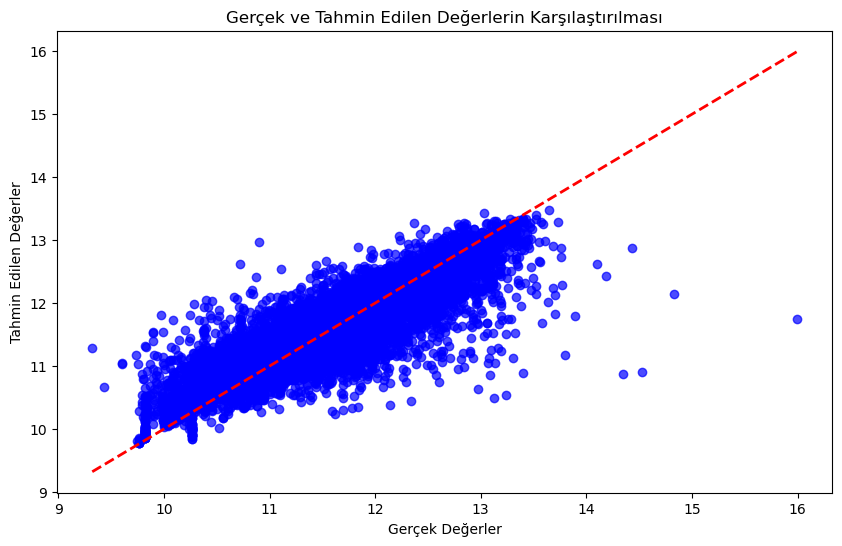

In [21]:
# Tahmin ve gerçek değerleri görselleştirin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırılması')

plt.savefig('Randonforest_turkce.png', format='png')

plt.show()

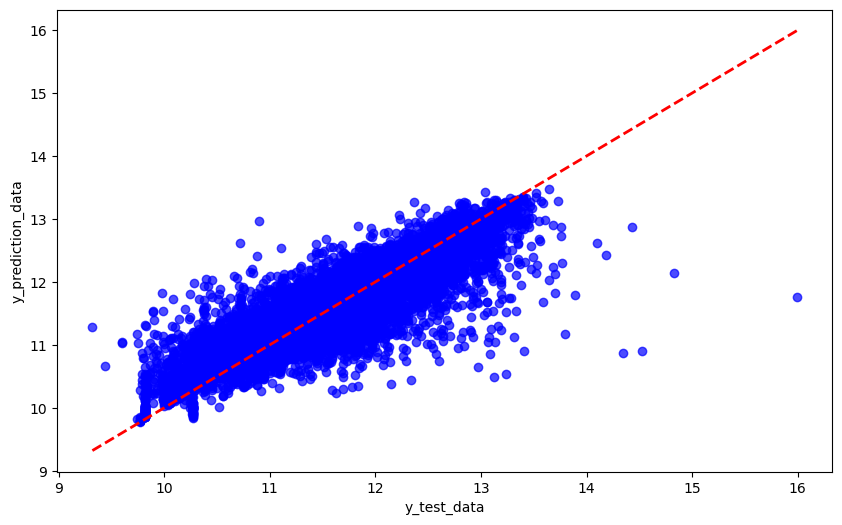

In [22]:
# Tahmin ve gerçek değerleri görselleştirin
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('y_test_data')
plt.ylabel('y_prediction_data')

plt.savefig('Randonforestyeni.png', format='png')

plt.show()

In [23]:
pip install shap==0.42.0

Note: you may need to restart the kernel to use updated packages.


In [24]:
import shap
X_sub = shap.sample(X_train, len(X_train))
explainer = shap.Explainer(best_model.predict, X_sub)
shap_values = explainer(X_test)

Exact explainer: 11072it [1:22:09,  2.24it/s]                           


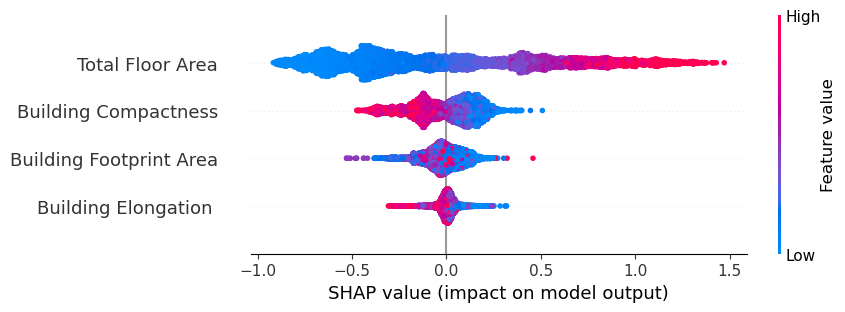

In [32]:
# SHAP beeswarm grafiğini oluşturun
shap.plots.beeswarm(shap_values, show=False)

# Grafiği kaydedin
plt.savefig('shap_values_beeswarm3.png', format='png', bbox_inches='tight')

# Grafiği gösterin (isteğe bağlı)
plt.show()

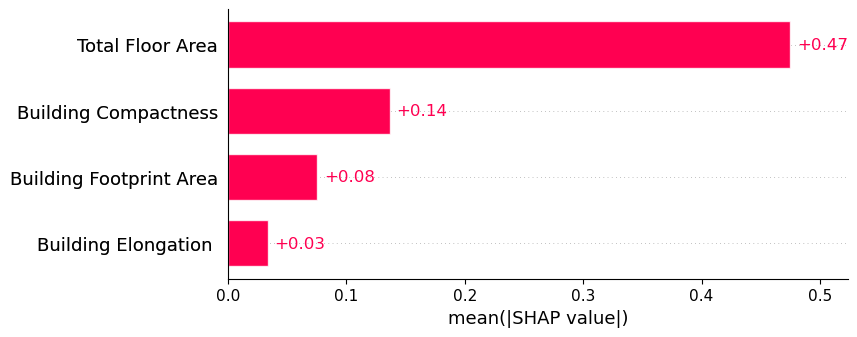

In [73]:
shap.plots.bar(shap_values, show=False)

plt.savefig('bar_RF.png', format='png', bbox_inches='tight')

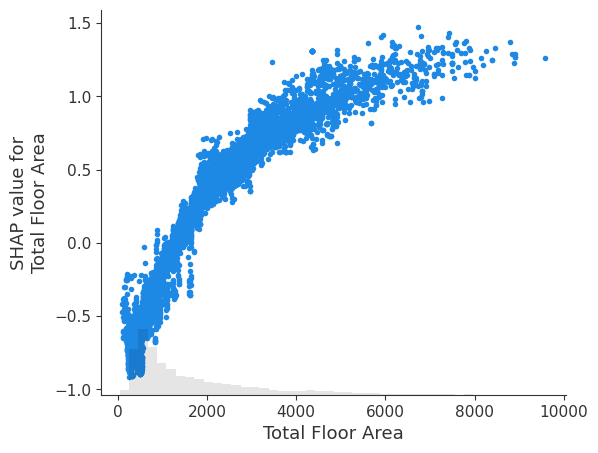

In [35]:
# SHAP scatter plot'u bu eksende çizdirin
shap.plots.scatter(shap_values[:, "Total Floor Area"], show=False)

# Mevcut figürü kaydedin
fig.savefig('shap_values_scatter.png', format='png', bbox_inches='tight')

# Grafiği gösterin (isteğe bağlı)
plt.show()

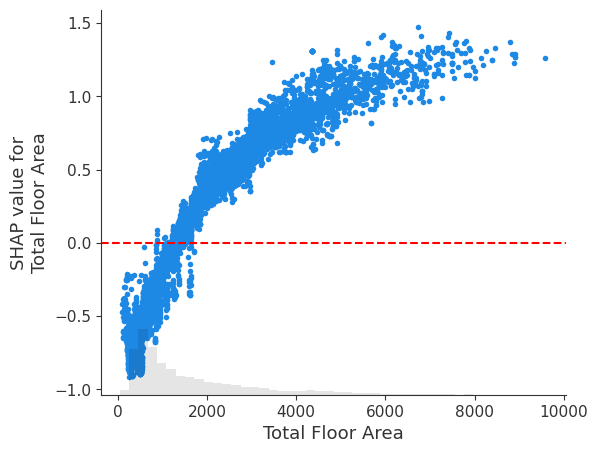

In [36]:
# Scatter plot oluşturulması
shap.plots.scatter(shap_values[:, "Total Floor Area"], show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')

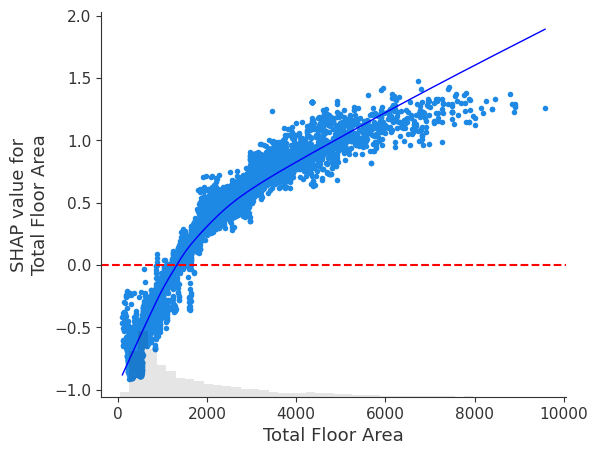

In [37]:
import statsmodels.api as sm

feature_name = "Total Floor Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()

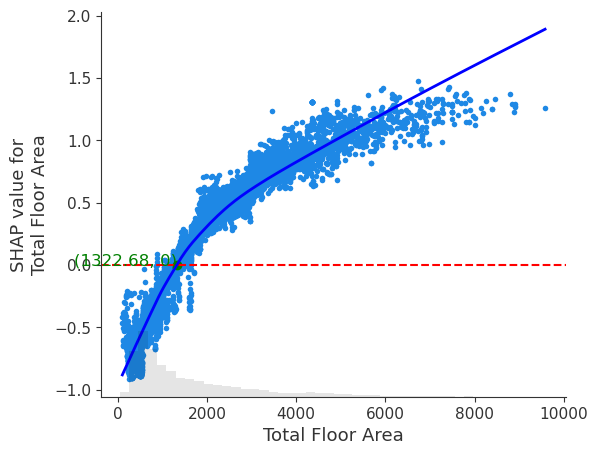

In [38]:
feature_name = "Total Floor Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# LOWESS eğrisi ile y=0 çizgisinin kesişim noktasını bulma
intersection_x = np.interp(0, z[:, 1], z[:, 0])

# Kesişim noktasını grafiğe ekleme
plt.scatter(intersection_x, 0, color='green')  # Kesişim noktasına yeşil nokta ekleme
plt.text(intersection_x, 0, f'({intersection_x:.2f}, 0)', fontsize=12, ha='right', color='green')  # Kesişim noktasına etiket ekleme

# Grafiği göstermek
plt.show()

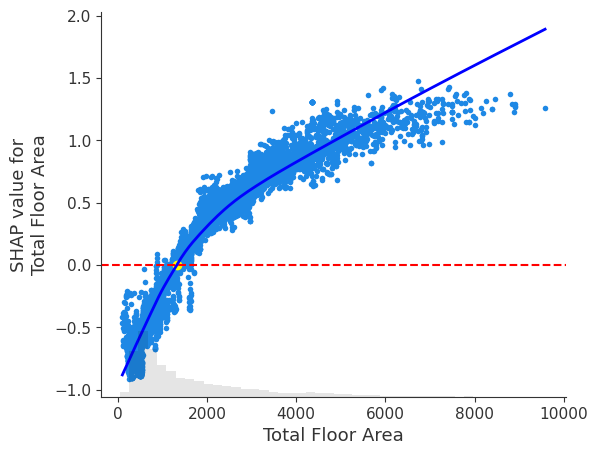

In [39]:
feature_name = "Total Floor Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# LOWESS eğrisi ile y=0 çizgisinin kesişim noktasını bulma
intersection_x = np.interp(0, z[:, 1], z[:, 0])

# Kesişim noktasını grafiğe ekleme
plt.scatter(intersection_x, 0, color='yellow')  # Kesişim noktasına yeşil nokta ekleme

# Grafiği göstermek
plt.show()

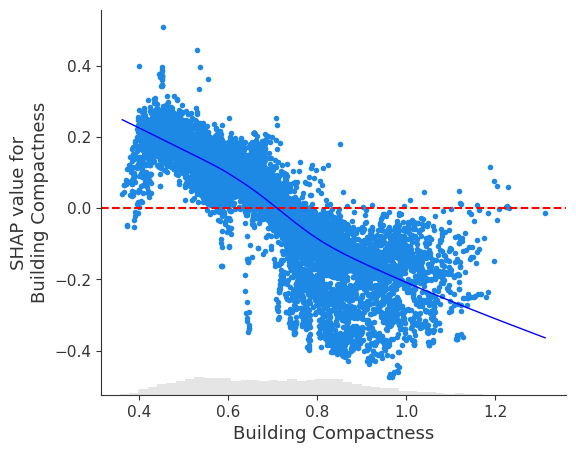

In [41]:
import statsmodels.api as sm

feature_name = "Building Compactness"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()

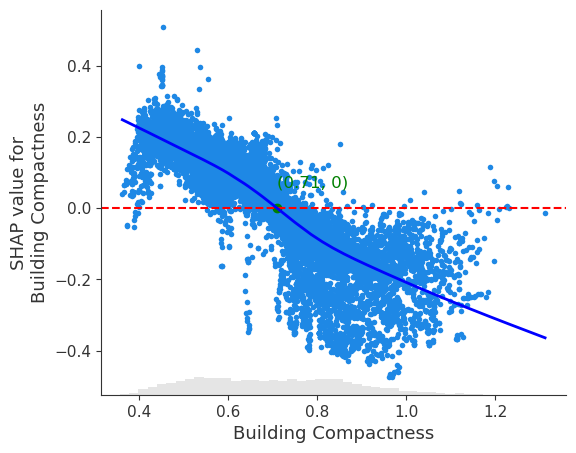

In [42]:

import shap
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.optimize import brentq

# Örnek shap_values ve "TOPLAM_INS" özellik adıyla scatter plot oluşturulması
# shap_values bir SHAP değerleri DataFrame veya benzeri bir veri yapısı olmalıdır
feature_name = "Building Compactness"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# LOWESS eğrisi ile y=0 çizgisinin kesişim noktasını bulma
# Kök bulma fonksiyonu
def f(x):
    return np.interp(x, z[:, 0], z[:, 1])

# Kesişim noktasını bulmak için brentq fonksiyonu
intersection_x = brentq(f, np.min(z[:, 0]), np.max(z[:, 0]))

# Kesişim noktasını grafiğe ekleme
plt.scatter(intersection_x, 0, color='green')  # Kesişim noktasına yeşil nokta ekleme
plt.text(intersection_x, 0.05, f'({intersection_x:.2f}, 0)', fontsize=12, ha='left', va='bottom', color='green')  # Kesişim noktasına etiket ekleme

# Grafiği göstermek
plt.show()


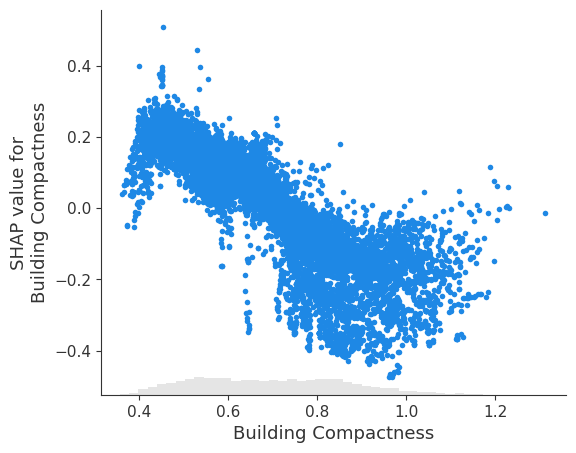

In [43]:
shap.plots.scatter(shap_values[:,"Building Compactness"])

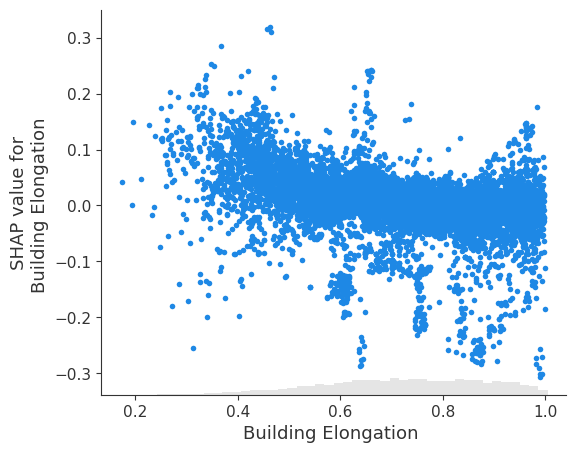

In [45]:
shap.plots.scatter(shap_values[:,"Building Elongation "])

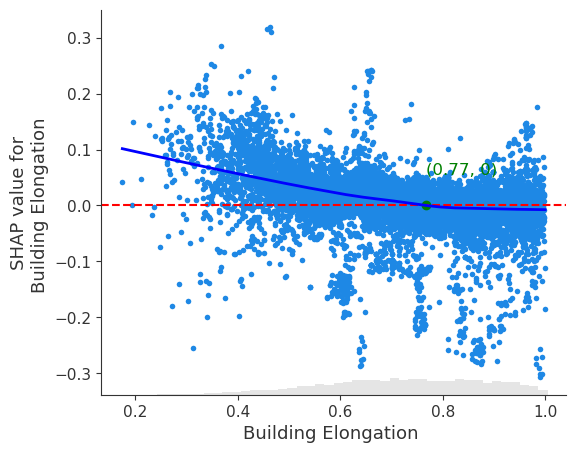

In [46]:
import shap
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.optimize import brentq

# Örnek shap_values ve "TOPLAM_INS" özellik adıyla scatter plot oluşturulması
# shap_values bir SHAP değerleri DataFrame veya benzeri bir veri yapısı olmalıdır
feature_name = "Building Elongation "
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# LOWESS eğrisi ile y=0 çizgisinin kesişim noktasını bulma
# Kök bulma fonksiyonu
def f(x):
    return np.interp(x, z[:, 0], z[:, 1])

# Kesişim noktasını bulmak için brentq fonksiyonu
intersection_x = brentq(f, np.min(z[:, 0]), np.max(z[:, 0]))

# Kesişim noktasını grafiğe ekleme
plt.scatter(intersection_x, 0, color='green')  # Kesişim noktasına yeşil nokta ekleme
plt.text(intersection_x, 0.05, f'({intersection_x:.2f}, 0)', fontsize=12, ha='left', va='bottom', color='green')  # Kesişim noktasına etiket ekleme

# Grafiği göstermek
plt.show()


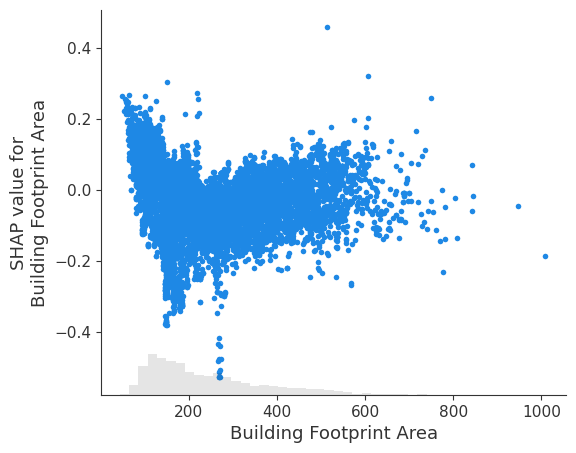

In [47]:
shap.plots.scatter(shap_values[:,"Building Footprint Area"])

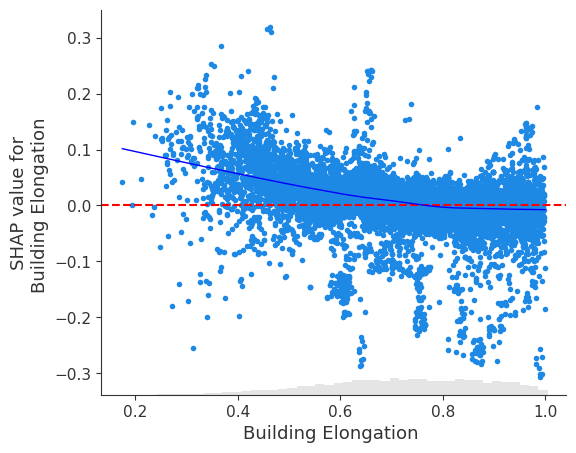

In [48]:
feature_name = "Building Elongation "
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()

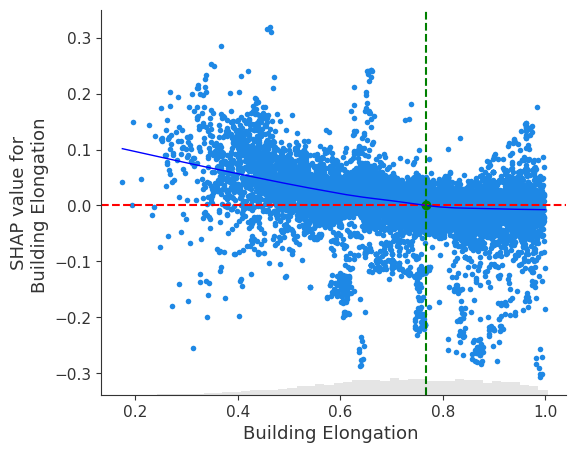

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap
from scipy.optimize import brentq

# Örnek veriler (Gerçek shap_values verilerinizi kullanmanız gerekecek)
# shap_values = ...

feature_name = "Building Elongation "
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Kesişim noktasını bulma
def lowess_function(x_val):
    return np.interp(x_val, z[:, 0], z[:, 1])

# LOWESS eğrisinin y=0 çizgisi ile kesiştiği noktayı bulma
x_intersect = brentq(lowess_function, min(z[:, 0]), max(z[:, 0]))

# Kesişim noktasını grafikte gösterme
plt.scatter(x_intersect, 0, color='green')  # Kesişim noktasını yeşil nokta olarak gösterme

# Kesişim noktasını x ekseninde işaretleme
plt.axvline(x=x_intersect, color='green', linestyle='--')  # Dikey çizgi

# Grafiği göstermek
plt.show()


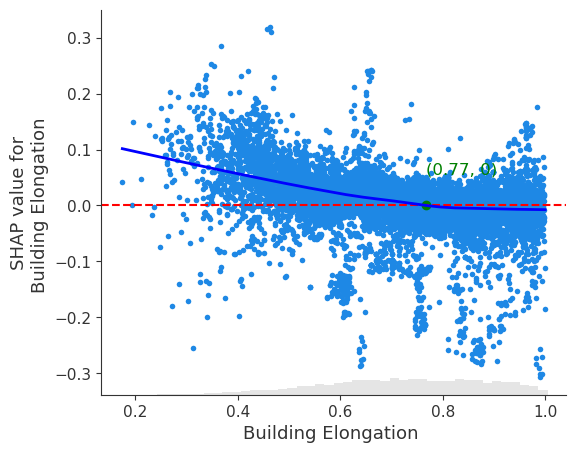

In [49]:
import shap
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Örnek shap_values ve "TOPLAM_INS" özellik adıyla scatter plot oluşturulması
# shap_values bir SHAP değerleri DataFrame veya benzeri bir veri yapısı olmalıdır
feature_name = "Building Elongation "
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# y=0 çizgisinin x eksenindeki noktalarını oluşturma
zero_line_x = np.linspace(np.min(z[:, 0]), np.max(z[:, 0]), 1000)
zero_line_y = np.zeros_like(zero_line_x)

# Kesişim noktalarını bulma
intersection_points = []
for i in range(len(zero_line_x) - 1):
    x1, x2 = zero_line_x[i], zero_line_x[i + 1]
    y1, y2 = zero_line_y[i], zero_line_y[i + 1]
    if np.sign(f(x1)) != np.sign(f(x2)):
        intersection_x = brentq(f, x1, x2)
        intersection_points.append(intersection_x)

# Kesişim noktalarını grafiğe ekleme
for intersection_x in intersection_points:
    plt.scatter(intersection_x, 0, color='green')  # Kesişim noktasına yeşil nokta ekleme
    plt.text(intersection_x, 0.05, f'({intersection_x:.2f}, 0)', fontsize=12, ha='left', va='bottom', color='green')  # Kesişim noktasına etiket ekleme

# Grafiği göstermek
plt.show()


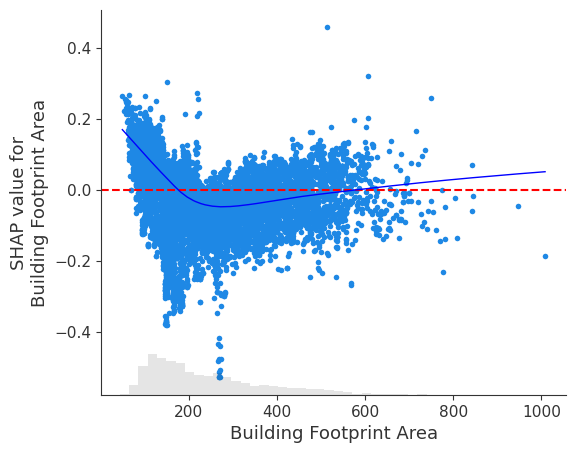

In [51]:
feature_name = "Building Footprint Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()

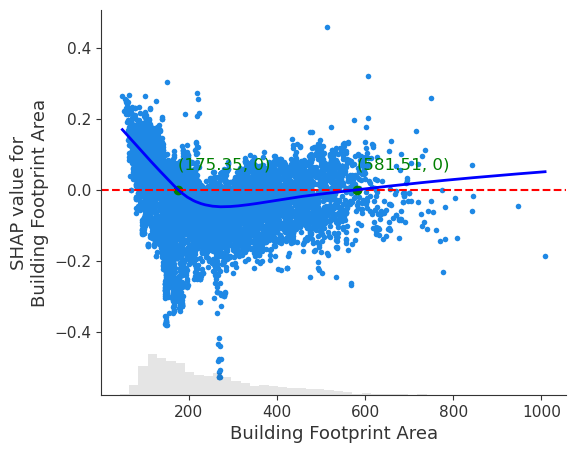

In [53]:

# Örnek shap_values ve "TOPLAM_INS" özellik adıyla scatter plot oluşturulması
# shap_values bir SHAP değerleri DataFrame veya benzeri bir veri yapısı olmalıdır
feature_name = "Building Footprint Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')  # y=0 noktasında kırmızı kesikli çizgi

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=2)

# y=0 çizgisinin x eksenindeki noktalarını oluşturma
zero_line_x = np.linspace(np.min(z[:, 0]), np.max(z[:, 0]), 1000)
zero_line_y = np.zeros_like(zero_line_x)

# Kesişim noktalarını bulma
intersection_points = []
for i in range(len(zero_line_x) - 1):
    x1, x2 = zero_line_x[i], zero_line_x[i + 1]
    y1, y2 = zero_line_y[i], zero_line_y[i + 1]
    if np.sign(f(x1)) != np.sign(f(x2)):
        intersection_x = brentq(f, x1, x2)
        intersection_points.append(intersection_x)

# Kesişim noktalarını grafiğe ekleme
for intersection_x in intersection_points:
    plt.scatter(intersection_x, 0, color='green')  # Kesişim noktasına yeşil nokta ekleme
    plt.text(intersection_x, 0.05, f'({intersection_x:.2f}, 0)', fontsize=12, ha='left', va='bottom', color='green')  # Kesişim noktasına etiket ekleme

# Grafiği göstermek
plt.show()

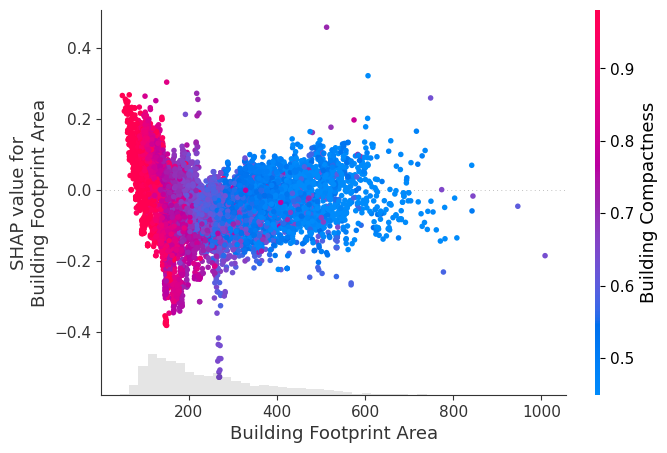

In [54]:
shap.plots.scatter(shap_values[:, "Building Footprint Area"], color=shap_values)

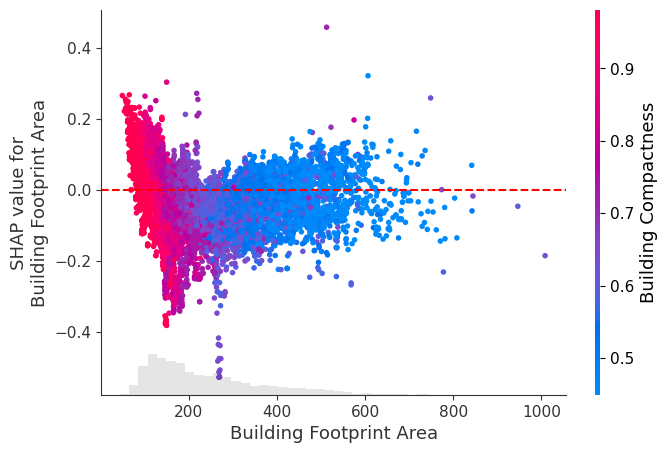

In [58]:
shap.plots.scatter(shap_values[:, "Building Footprint Area"], show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')

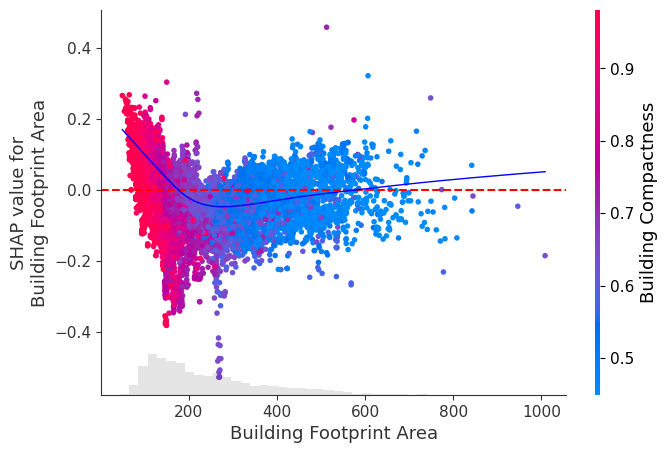

In [59]:
feature_name = "Building Footprint Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()

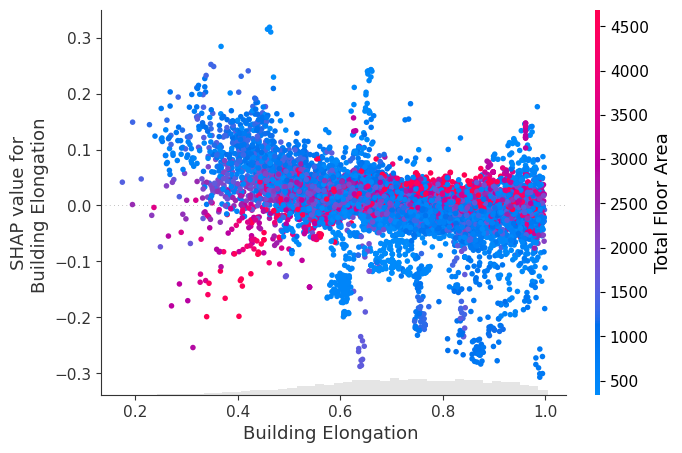

In [61]:
shap.plots.scatter(shap_values[:, "Building Elongation "], color=shap_values)

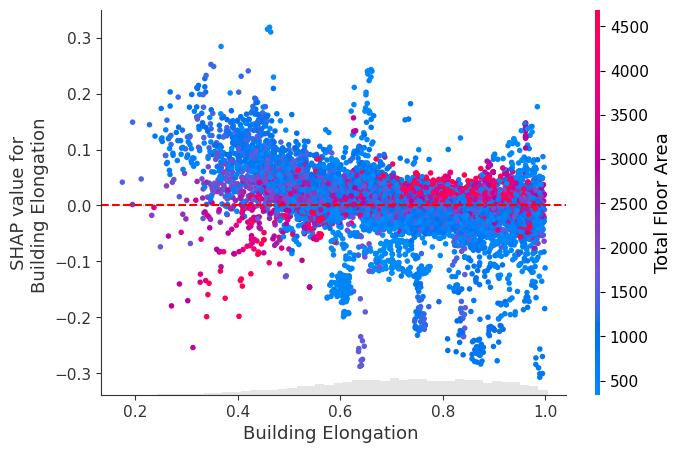

In [62]:
shap.plots.scatter(shap_values[:, "Building Elongation "], show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')

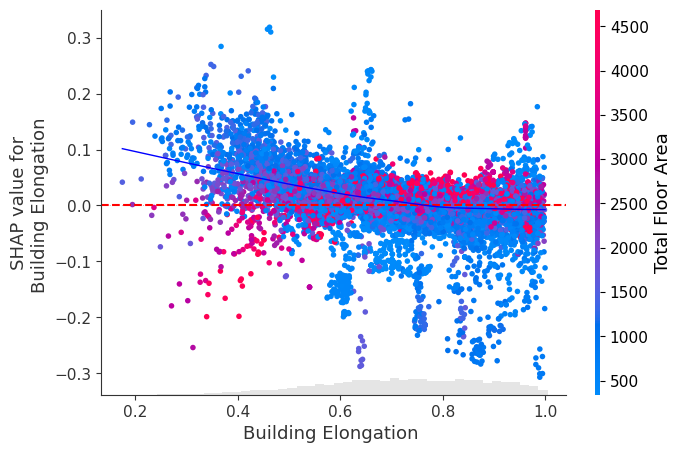

In [68]:
feature_name = "Building Elongation "
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()


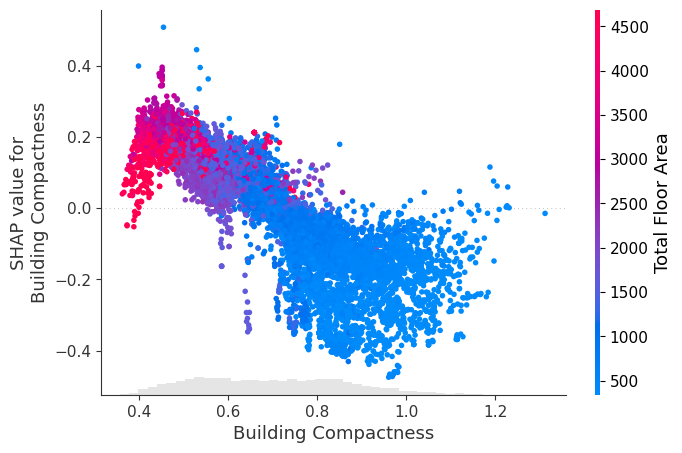

In [63]:
shap.plots.scatter(shap_values[:, "Building Compactness"], color=shap_values)

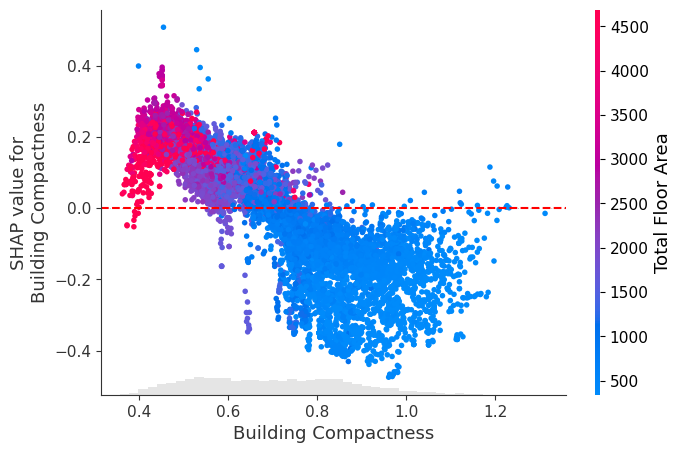

In [64]:
# Scatter plot oluşturulması
shap.plots.scatter(shap_values[:, "Building Compactness"], show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')

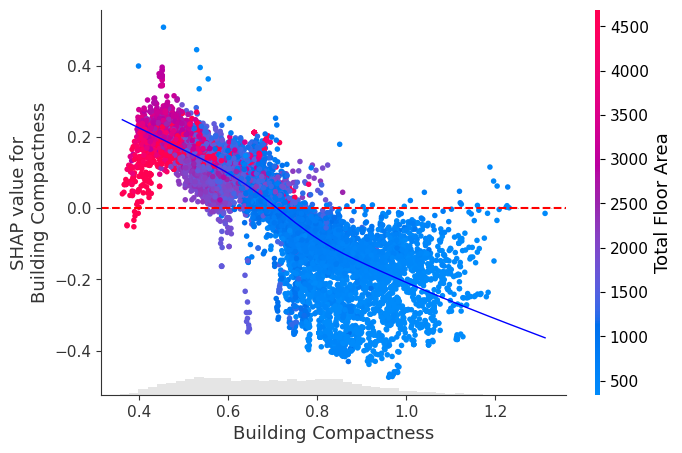

In [69]:
feature_name = "Building Compactness"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()


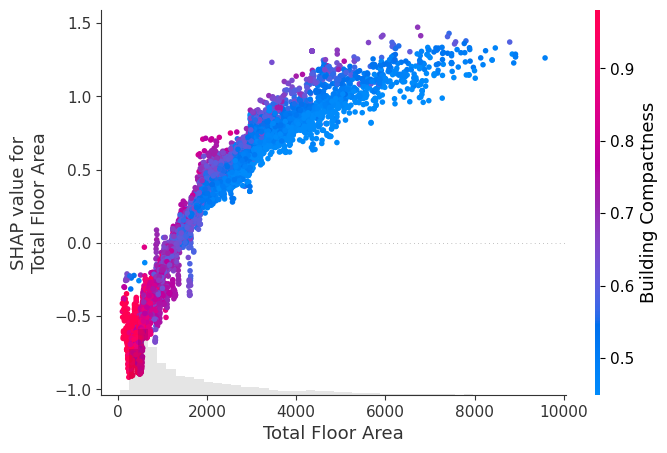

In [66]:
shap.plots.scatter(shap_values[:, "Total Floor Area"], color=shap_values)

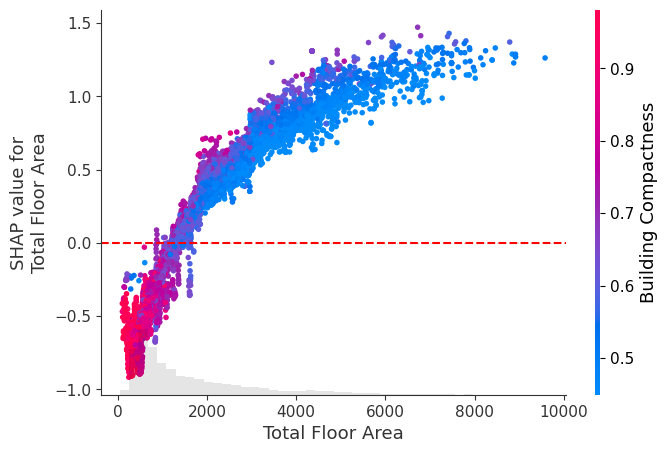

In [67]:
# Scatter plot oluşturulması
shap.plots.scatter(shap_values[:, "Total Floor Area"], show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--')

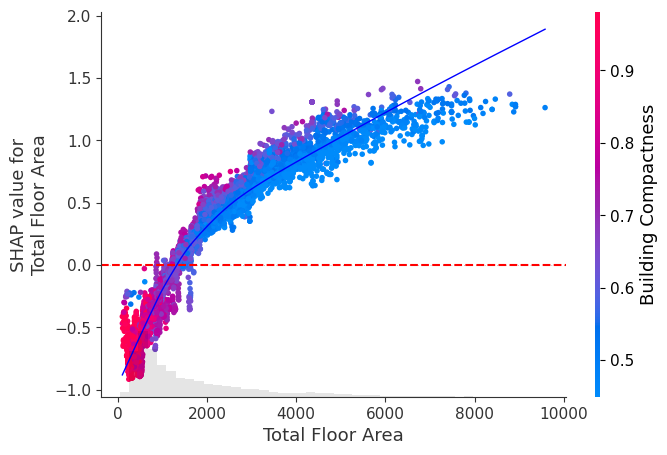

In [70]:
feature_name = "Total Floor Area"
shap_values_feature = shap_values[:, feature_name]

# Scatter plot oluşturulması
shap.plots.scatter(shap_values_feature, show=False, color=shap_values)

# Yatay çizgi eklemek için matplotlib kullanımı
plt.axhline(y=0, color='r', linestyle='--') 

# LOWESS eğrisini hesaplama
x = shap_values_feature.data
y = shap_values_feature.values
lowess = sm.nonparametric.lowess
z = lowess(y, x)

# LOWESS eğrisini grafiğe ekleme
plt.plot(z[:, 0], z[:, 1], color='blue', linewidth=1)

# Grafiği göstermek
plt.show()


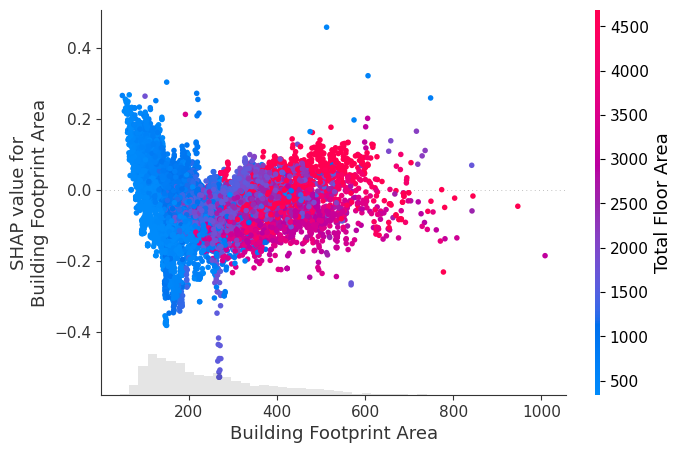

In [65]:
shap.plots.scatter(shap_values[:, "Building Footprint Area"],  color=shap_values[:,"Total Floor Area"])
